In [1]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from keras.models import Model
from keras.layers import Dense, Dropout, Input, Activation, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import ClusterCentroids
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss 
from numpy import mean
from numpy import std
import pandas as pd

       rel1_ADMINISTERED_TO  rel1_AFFECTS  rel1_ASSOCIATED_WITH  \
14827                     5             0                     0   
5850                      1             1                     0   
604                       4            12                     0   
6584                      1             0                     0   
12655                     1             0                     0   
...                     ...           ...                   ...   
13735                     0             0                     0   
12360                     0             0                     0   
16163                     0             0                     0   
20758                     0             0                     0   
9633                      0             0                     0   

       rel1_AUGMENTS  rel1_CAUSES  rel1_COEXISTS_WITH  rel1_compared_with  \
14827              0            0                   0                   0   
5850               0            0        

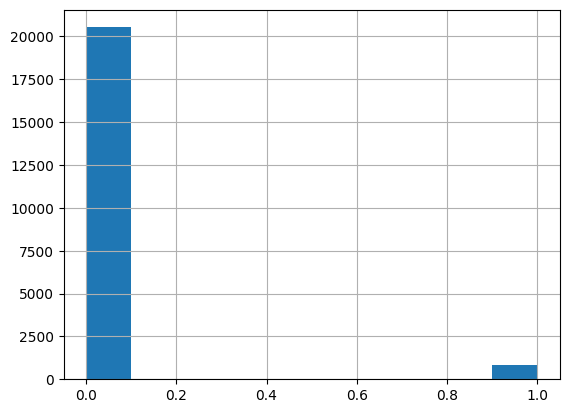

In [2]:
data = pd.read_csv("nozeros2024.csv")
feature_cols=["rel1_ADMINISTERED_TO", "rel1_AFFECTS", "rel1_ASSOCIATED_WITH", "rel1_AUGMENTS", "rel1_CAUSES", "rel1_COEXISTS_WITH", "rel1_compared_with", "rel1_COMPLICATES", "rel1_CONVERTS_TO", "rel1_DIAGNOSES", "rel1_different_from", "rel1_different_than", "rel1_DISRUPTS", "rel1_higher_than", "rel1_INHIBITS", "rel1_INTERACTS_WITH", "rel1_IS_A", "rel1_ISA", "rel1_LOCATION_OF", "rel1_lower_than", "rel1_MANIFESTATION_OF", "rel1_METHOD_OF", "rel1_OCCURS_IN", "rel1_PART_OF", "rel1_PRECEDES", "rel1_PREDISPOSES", "rel1_PREVENTS", "rel1_PROCESS_OF", "rel1_PRODUCES", "rel1_same_as", "rel1_STIMULATES", "rel1_TREATS", "rel1_USES", "rel1_MENTIONED_IN", "rel1_HAS_MESH", "rel2_ADMINISTERED_TO", "rel2_AFFECTS", "rel2_ASSOCIATED_WITH", "rel2_AUGMENTS", "rel2_CAUSES", "rel2_COEXISTS_WITH", "rel2_compared_with", "rel2_COMPLICATES", "rel2_CONVERTS_TO", "rel2_DIAGNOSES", "rel2_different_from", "rel2_different_than", "rel2_DISRUPTS", "rel2_higher_than", "rel2_INHIBITS", "rel2_INTERACTS_WITH", "rel2_IS_A", "rel2_ISA", "rel2_LOCATION_OF", "rel2_lower_than", "rel2_MANIFESTATION_OF", "rel2_METHOD_OF", "rel2_OCCURS_IN", "rel2_PART_OF", "rel2_PRECEDES", "rel2_PREDISPOSES", "rel2_PREVENTS", "rel2_PROCESS_OF", "rel2_PRODUCES", "rel2_same_as", "rel2_STIMULATES", "rel2_TREATS", "rel2_USES", "rel2_MENTIONED_IN", "rel2_HAS_MESH", "rel3_ADMINISTERED_TO", "rel3_AFFECTS", "rel3_ASSOCIATED_WITH", "rel3_AUGMENTS", "rel3_CAUSES", "rel3_COEXISTS_WITH", "rel3_compared_with", "rel3_COMPLICATES", "rel3_CONVERTS_TO", "rel3_DIAGNOSES", "rel3_different_from", "rel3_different_than", "rel3_DISRUPTS", "rel3_higher_than", "rel3_INHIBITS", "rel3_INTERACTS_WITH", "rel3_IS_A", "rel3_ISA", "rel3_LOCATION_OF", "rel3_lower_than", "rel3_MANIFESTATION_OF", "rel3_METHOD_OF", "rel3_OCCURS_IN", "rel3_PART_OF", "rel3_PRECEDES", "rel3_PREDISPOSES", "rel3_PREVENTS", "rel3_PROCESS_OF", "rel3_PRODUCES", "rel3_same_as", "rel3_STIMULATES", "rel3_TREATS", "rel3_USES", "rel3_MENTIONED_IN", "rel3_HAS_MESH"]

data['INTERACTS'].hist()
X=data[feature_cols]
y=data["INTERACTS"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print(X_train)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)



In [3]:
model = Sequential()
model.add(Dense(512, input_shape=(X_train.shape[1],)))
model.add(Activation('tanh'))
model.add(BatchNormalization())
                           
model.add(Dropout(0.1))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(128))
model.add(Activation('tanh'))

model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(1))
model.add(Activation('sigmoid'))
print(model.summary())

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 dense (Dense)               (None, 512)               54272     


 activation (Activation)     (None, 512)               0         


 batch_normalization (Batch  (None, 512)               2048      


 Normalization)                                                  


 dropout (Dropout)           (None, 512)               0         


 dense_1 (Dense)             (None, 128)               65664     


 activation_1 (Activation)   (None, 128)               0         


 batch_normalization_1 (Bat  (None, 128)               512       


 chNormalization)                                                


 dropout_1 (Dropout)         (None, 128)               0         


 dense_2 (Dense)             (None, 1)                 129       


 activation_2 (Activation)   (None, 1)                 0         


Total params: 122625 (479.00 KB)


Trainable params: 121345 (474.00 KB)


Non-trainable params: 1280 (5.00 KB)


_________________________________________________________________


None


In [4]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=tf.keras.metrics.Recall())
model.fit(X_train, y_train,
          batch_size=128, epochs=100, verbose=2,
          validation_data=(X_test, y_test))

Epoch 1/100


134/134 - 2s - loss: 0.4302 - recall: 0.3517 - val_loss: 0.2274 - val_recall: 0.0671 - 2s/epoch - 12ms/step


Epoch 2/100


134/134 - 0s - loss: 0.1608 - recall: 0.2416 - val_loss: 0.1329 - val_recall: 0.1341 - 455ms/epoch - 3ms/step


Epoch 3/100


134/134 - 0s - loss: 0.1278 - recall: 0.2661 - val_loss: 0.1228 - val_recall: 0.2073 - 455ms/epoch - 3ms/step


Epoch 4/100


134/134 - 0s - loss: 0.1213 - recall: 0.2813 - val_loss: 0.1248 - val_recall: 0.2561 - 458ms/epoch - 3ms/step


Epoch 5/100


134/134 - 0s - loss: 0.1167 - recall: 0.2859 - val_loss: 0.1168 - val_recall: 0.2683 - 455ms/epoch - 3ms/step


Epoch 6/100


134/134 - 0s - loss: 0.1161 - recall: 0.3028 - val_loss: 0.1284 - val_recall: 0.2317 - 455ms/epoch - 3ms/step


Epoch 7/100


134/134 - 0s - loss: 0.1140 - recall: 0.3058 - val_loss: 0.2749 - val_recall: 0.4878 - 453ms/epoch - 3ms/step


Epoch 8/100


134/134 - 0s - loss: 0.1106 - recall: 0.3272 - val_loss: 0.1144 - val_recall: 0.3232 - 440ms/epoch - 3ms/step


Epoch 9/100


134/134 - 0s - loss: 0.1096 - recall: 0.3226 - val_loss: 0.1130 - val_recall: 0.2805 - 442ms/epoch - 3ms/step


Epoch 10/100


134/134 - 0s - loss: 0.1074 - recall: 0.3364 - val_loss: 0.1174 - val_recall: 0.2561 - 455ms/epoch - 3ms/step


Epoch 11/100


134/134 - 0s - loss: 0.1075 - recall: 0.3287 - val_loss: 0.1070 - val_recall: 0.3110 - 471ms/epoch - 4ms/step


Epoch 12/100


134/134 - 0s - loss: 0.1032 - recall: 0.3639 - val_loss: 0.1023 - val_recall: 0.3841 - 455ms/epoch - 3ms/step


Epoch 13/100


134/134 - 0s - loss: 0.1020 - recall: 0.3761 - val_loss: 0.1107 - val_recall: 0.3476 - 442ms/epoch - 3ms/step


Epoch 14/100


134/134 - 0s - loss: 0.1022 - recall: 0.3670 - val_loss: 0.1409 - val_recall: 0.3780 - 469ms/epoch - 3ms/step


Epoch 15/100


134/134 - 0s - loss: 0.1022 - recall: 0.3685 - val_loss: 0.1058 - val_recall: 0.3476 - 455ms/epoch - 3ms/step


Epoch 16/100


134/134 - 0s - loss: 0.0969 - recall: 0.3869 - val_loss: 0.1026 - val_recall: 0.3537 - 455ms/epoch - 3ms/step


Epoch 17/100


134/134 - 0s - loss: 0.1012 - recall: 0.3807 - val_loss: 0.1185 - val_recall: 0.3902 - 458ms/epoch - 3ms/step


Epoch 18/100


134/134 - 0s - loss: 0.0975 - recall: 0.3976 - val_loss: 0.1086 - val_recall: 0.3598 - 455ms/epoch - 3ms/step


Epoch 19/100


134/134 - 0s - loss: 0.0970 - recall: 0.3945 - val_loss: 0.2376 - val_recall: 0.5671 - 485ms/epoch - 4ms/step


Epoch 20/100


134/134 - 0s - loss: 0.0951 - recall: 0.4113 - val_loss: 0.0992 - val_recall: 0.3598 - 464ms/epoch - 3ms/step


Epoch 21/100


134/134 - 0s - loss: 0.0956 - recall: 0.3930 - val_loss: 0.1383 - val_recall: 0.4634 - 471ms/epoch - 4ms/step


Epoch 22/100


134/134 - 0s - loss: 0.0950 - recall: 0.4205 - val_loss: 0.2313 - val_recall: 0.5244 - 478ms/epoch - 4ms/step


Epoch 23/100


134/134 - 0s - loss: 0.0959 - recall: 0.4113 - val_loss: 0.1049 - val_recall: 0.4268 - 481ms/epoch - 4ms/step


Epoch 24/100


134/134 - 0s - loss: 0.0943 - recall: 0.4128 - val_loss: 0.1028 - val_recall: 0.3598 - 481ms/epoch - 4ms/step


Epoch 25/100


134/134 - 0s - loss: 0.0942 - recall: 0.4021 - val_loss: 0.1031 - val_recall: 0.3354 - 476ms/epoch - 4ms/step


Epoch 26/100


134/134 - 1s - loss: 0.0913 - recall: 0.4312 - val_loss: 0.1395 - val_recall: 0.4390 - 521ms/epoch - 4ms/step


Epoch 27/100


134/134 - 0s - loss: 0.0924 - recall: 0.4235 - val_loss: 0.1369 - val_recall: 0.4695 - 499ms/epoch - 4ms/step


Epoch 28/100


134/134 - 0s - loss: 0.0915 - recall: 0.4327 - val_loss: 0.0999 - val_recall: 0.4573 - 489ms/epoch - 4ms/step


Epoch 29/100


134/134 - 0s - loss: 0.0903 - recall: 0.4312 - val_loss: 0.0982 - val_recall: 0.3902 - 492ms/epoch - 4ms/step


Epoch 30/100


134/134 - 0s - loss: 0.0893 - recall: 0.4419 - val_loss: 0.1474 - val_recall: 0.4512 - 480ms/epoch - 4ms/step


Epoch 31/100


134/134 - 0s - loss: 0.0896 - recall: 0.4297 - val_loss: 0.1061 - val_recall: 0.3476 - 463ms/epoch - 3ms/step


Epoch 32/100


134/134 - 0s - loss: 0.0883 - recall: 0.4434 - val_loss: 0.0921 - val_recall: 0.4085 - 467ms/epoch - 3ms/step


Epoch 33/100


134/134 - 0s - loss: 0.0866 - recall: 0.4648 - val_loss: 0.1731 - val_recall: 0.5061 - 492ms/epoch - 4ms/step


Epoch 34/100


134/134 - 0s - loss: 0.0862 - recall: 0.4648 - val_loss: 0.0949 - val_recall: 0.4390 - 468ms/epoch - 3ms/step


Epoch 35/100


134/134 - 0s - loss: 0.0876 - recall: 0.4495 - val_loss: 0.0977 - val_recall: 0.4451 - 476ms/epoch - 4ms/step


Epoch 36/100


134/134 - 0s - loss: 0.0870 - recall: 0.4450 - val_loss: 0.0926 - val_recall: 0.4329 - 480ms/epoch - 4ms/step


Epoch 37/100


134/134 - 0s - loss: 0.0840 - recall: 0.4709 - val_loss: 0.0942 - val_recall: 0.3780 - 491ms/epoch - 4ms/step


Epoch 38/100


134/134 - 0s - loss: 0.0869 - recall: 0.4602 - val_loss: 0.1471 - val_recall: 0.5000 - 445ms/epoch - 3ms/step


Epoch 39/100


134/134 - 0s - loss: 0.0864 - recall: 0.4557 - val_loss: 0.1028 - val_recall: 0.3476 - 453ms/epoch - 3ms/step


Epoch 40/100


134/134 - 0s - loss: 0.0821 - recall: 0.4847 - val_loss: 0.1231 - val_recall: 0.3354 - 490ms/epoch - 4ms/step


Epoch 41/100


134/134 - 0s - loss: 0.0842 - recall: 0.4878 - val_loss: 0.0936 - val_recall: 0.5000 - 479ms/epoch - 4ms/step


Epoch 42/100


134/134 - 0s - loss: 0.0850 - recall: 0.4709 - val_loss: 0.0966 - val_recall: 0.4756 - 472ms/epoch - 4ms/step


Epoch 43/100


134/134 - 0s - loss: 0.0832 - recall: 0.4862 - val_loss: 0.0996 - val_recall: 0.3841 - 455ms/epoch - 3ms/step


Epoch 44/100


134/134 - 0s - loss: 0.0818 - recall: 0.4985 - val_loss: 0.0893 - val_recall: 0.4390 - 489ms/epoch - 4ms/step


Epoch 45/100


134/134 - 0s - loss: 0.0820 - recall: 0.4832 - val_loss: 0.1330 - val_recall: 0.5549 - 484ms/epoch - 4ms/step


Epoch 46/100


134/134 - 1s - loss: 0.0818 - recall: 0.4954 - val_loss: 0.1483 - val_recall: 0.5183 - 511ms/epoch - 4ms/step


Epoch 47/100


134/134 - 0s - loss: 0.0832 - recall: 0.4801 - val_loss: 0.0969 - val_recall: 0.4085 - 456ms/epoch - 3ms/step


Epoch 48/100


134/134 - 0s - loss: 0.0814 - recall: 0.4847 - val_loss: 0.0981 - val_recall: 0.4329 - 489ms/epoch - 4ms/step


Epoch 49/100


134/134 - 0s - loss: 0.0822 - recall: 0.4862 - val_loss: 0.0915 - val_recall: 0.4085 - 465ms/epoch - 3ms/step


Epoch 50/100


134/134 - 0s - loss: 0.0799 - recall: 0.5031 - val_loss: 0.0991 - val_recall: 0.3841 - 454ms/epoch - 3ms/step


Epoch 51/100


134/134 - 0s - loss: 0.0815 - recall: 0.5015 - val_loss: 0.1033 - val_recall: 0.5183 - 453ms/epoch - 3ms/step


Epoch 52/100


134/134 - 0s - loss: 0.0799 - recall: 0.5015 - val_loss: 0.0936 - val_recall: 0.3780 - 467ms/epoch - 3ms/step


Epoch 53/100


134/134 - 0s - loss: 0.0789 - recall: 0.5107 - val_loss: 0.0872 - val_recall: 0.4512 - 460ms/epoch - 3ms/step


Epoch 54/100


134/134 - 0s - loss: 0.0771 - recall: 0.5260 - val_loss: 0.1761 - val_recall: 0.5000 - 485ms/epoch - 4ms/step


Epoch 55/100


134/134 - 0s - loss: 0.0792 - recall: 0.5153 - val_loss: 0.2188 - val_recall: 0.5732 - 448ms/epoch - 3ms/step


Epoch 56/100


134/134 - 0s - loss: 0.0798 - recall: 0.5000 - val_loss: 0.0945 - val_recall: 0.4085 - 474ms/epoch - 4ms/step


Epoch 57/100


134/134 - 0s - loss: 0.0768 - recall: 0.5107 - val_loss: 0.0936 - val_recall: 0.4817 - 468ms/epoch - 3ms/step


Epoch 58/100


134/134 - 0s - loss: 0.0760 - recall: 0.5076 - val_loss: 0.0867 - val_recall: 0.4817 - 453ms/epoch - 3ms/step


Epoch 59/100


134/134 - 0s - loss: 0.0781 - recall: 0.5122 - val_loss: 0.1207 - val_recall: 0.5488 - 453ms/epoch - 3ms/step


Epoch 60/100


134/134 - 0s - loss: 0.0786 - recall: 0.5046 - val_loss: 0.1115 - val_recall: 0.3415 - 473ms/epoch - 4ms/step


Epoch 61/100


134/134 - 0s - loss: 0.0752 - recall: 0.5214 - val_loss: 0.1349 - val_recall: 0.4756 - 476ms/epoch - 4ms/step


Epoch 62/100


134/134 - 0s - loss: 0.0758 - recall: 0.5229 - val_loss: 0.1044 - val_recall: 0.5122 - 454ms/epoch - 3ms/step


Epoch 63/100


134/134 - 1s - loss: 0.0782 - recall: 0.5199 - val_loss: 0.1115 - val_recall: 0.5244 - 537ms/epoch - 4ms/step


Epoch 64/100


134/134 - 1s - loss: 0.0736 - recall: 0.5413 - val_loss: 0.0888 - val_recall: 0.4451 - 519ms/epoch - 4ms/step


Epoch 65/100


134/134 - 0s - loss: 0.0749 - recall: 0.5183 - val_loss: 0.0940 - val_recall: 0.3963 - 496ms/epoch - 4ms/step


Epoch 66/100


134/134 - 0s - loss: 0.0747 - recall: 0.5275 - val_loss: 0.0977 - val_recall: 0.4451 - 481ms/epoch - 4ms/step


Epoch 67/100


134/134 - 0s - loss: 0.0719 - recall: 0.5428 - val_loss: 0.0896 - val_recall: 0.4695 - 488ms/epoch - 4ms/step


Epoch 68/100


134/134 - 0s - loss: 0.0752 - recall: 0.5352 - val_loss: 0.1038 - val_recall: 0.4146 - 486ms/epoch - 4ms/step


Epoch 69/100


134/134 - 0s - loss: 0.0753 - recall: 0.5321 - val_loss: 0.1007 - val_recall: 0.5000 - 468ms/epoch - 3ms/step


Epoch 70/100


134/134 - 1s - loss: 0.0740 - recall: 0.5245 - val_loss: 0.0954 - val_recall: 0.4024 - 508ms/epoch - 4ms/step


Epoch 71/100


134/134 - 0s - loss: 0.0739 - recall: 0.5474 - val_loss: 0.0962 - val_recall: 0.4695 - 475ms/epoch - 4ms/step


Epoch 72/100


134/134 - 0s - loss: 0.0752 - recall: 0.5367 - val_loss: 0.0963 - val_recall: 0.4329 - 455ms/epoch - 3ms/step


Epoch 73/100


134/134 - 0s - loss: 0.0743 - recall: 0.5398 - val_loss: 0.0886 - val_recall: 0.5610 - 463ms/epoch - 3ms/step


Epoch 74/100


134/134 - 0s - loss: 0.0747 - recall: 0.5459 - val_loss: 0.0831 - val_recall: 0.4573 - 471ms/epoch - 4ms/step


Epoch 75/100


134/134 - 0s - loss: 0.0739 - recall: 0.5352 - val_loss: 0.1204 - val_recall: 0.5122 - 453ms/epoch - 3ms/step


Epoch 76/100


134/134 - 0s - loss: 0.0721 - recall: 0.5566 - val_loss: 0.0950 - val_recall: 0.4512 - 453ms/epoch - 3ms/step


Epoch 77/100


134/134 - 0s - loss: 0.0738 - recall: 0.5321 - val_loss: 0.0867 - val_recall: 0.5000 - 453ms/epoch - 3ms/step


Epoch 78/100


134/134 - 0s - loss: 0.0737 - recall: 0.5413 - val_loss: 0.0906 - val_recall: 0.4756 - 453ms/epoch - 3ms/step


Epoch 79/100


134/134 - 0s - loss: 0.0736 - recall: 0.5520 - val_loss: 0.2505 - val_recall: 0.6585 - 469ms/epoch - 3ms/step


Epoch 80/100


134/134 - 0s - loss: 0.0728 - recall: 0.5352 - val_loss: 0.0964 - val_recall: 0.5366 - 492ms/epoch - 4ms/step


Epoch 81/100


134/134 - 0s - loss: 0.0723 - recall: 0.5550 - val_loss: 0.1211 - val_recall: 0.5183 - 481ms/epoch - 4ms/step


Epoch 82/100


134/134 - 0s - loss: 0.0726 - recall: 0.5474 - val_loss: 0.0884 - val_recall: 0.4512 - 464ms/epoch - 3ms/step


Epoch 83/100


134/134 - 0s - loss: 0.0697 - recall: 0.5612 - val_loss: 0.0934 - val_recall: 0.4756 - 447ms/epoch - 3ms/step


Epoch 84/100


134/134 - 0s - loss: 0.0725 - recall: 0.5566 - val_loss: 0.1075 - val_recall: 0.5549 - 469ms/epoch - 3ms/step


Epoch 85/100


134/134 - 0s - loss: 0.0687 - recall: 0.5810 - val_loss: 0.1125 - val_recall: 0.4390 - 453ms/epoch - 3ms/step


Epoch 86/100


134/134 - 0s - loss: 0.0713 - recall: 0.5535 - val_loss: 0.0903 - val_recall: 0.4268 - 483ms/epoch - 4ms/step


Epoch 87/100


134/134 - 0s - loss: 0.0710 - recall: 0.5642 - val_loss: 0.3366 - val_recall: 0.7073 - 490ms/epoch - 4ms/step


Epoch 88/100


134/134 - 0s - loss: 0.0694 - recall: 0.5642 - val_loss: 0.1788 - val_recall: 0.6037 - 475ms/epoch - 4ms/step


Epoch 89/100


134/134 - 0s - loss: 0.0687 - recall: 0.5749 - val_loss: 0.0980 - val_recall: 0.4634 - 453ms/epoch - 3ms/step


Epoch 90/100


134/134 - 0s - loss: 0.0709 - recall: 0.5581 - val_loss: 0.0966 - val_recall: 0.4390 - 469ms/epoch - 3ms/step


Epoch 91/100


134/134 - 0s - loss: 0.0682 - recall: 0.5826 - val_loss: 0.1927 - val_recall: 0.5183 - 468ms/epoch - 3ms/step


Epoch 92/100


134/134 - 0s - loss: 0.0683 - recall: 0.5688 - val_loss: 0.1118 - val_recall: 0.5732 - 472ms/epoch - 4ms/step


Epoch 93/100


134/134 - 0s - loss: 0.0685 - recall: 0.5642 - val_loss: 0.0851 - val_recall: 0.4207 - 453ms/epoch - 3ms/step


Epoch 94/100


134/134 - 0s - loss: 0.0680 - recall: 0.5703 - val_loss: 0.1847 - val_recall: 0.6159 - 453ms/epoch - 3ms/step


Epoch 95/100


134/134 - 0s - loss: 0.0672 - recall: 0.5795 - val_loss: 0.1701 - val_recall: 0.5671 - 453ms/epoch - 3ms/step


Epoch 96/100


134/134 - 0s - loss: 0.0679 - recall: 0.5765 - val_loss: 0.1122 - val_recall: 0.4085 - 469ms/epoch - 3ms/step


Epoch 97/100


134/134 - 0s - loss: 0.0671 - recall: 0.5749 - val_loss: 0.1121 - val_recall: 0.5122 - 477ms/epoch - 4ms/step


Epoch 98/100


134/134 - 0s - loss: 0.0693 - recall: 0.5765 - val_loss: 0.0897 - val_recall: 0.4451 - 490ms/epoch - 4ms/step


Epoch 99/100


134/134 - 0s - loss: 0.0678 - recall: 0.5749 - val_loss: 0.1276 - val_recall: 0.5366 - 480ms/epoch - 4ms/step


Epoch 100/100


134/134 - 1s - loss: 0.0681 - recall: 0.5765 - val_loss: 0.0966 - val_recall: 0.5305 - 516ms/epoch - 4ms/step
